In [33]:
# Import most common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Titanic Survival Prediction

This notebook is inspired in the Kaggle competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal of this competition is to predict whether a passenger survived the Titanic disaster based on passenger data. The data is split into a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model. The test set does not contain the survival data, so the model is evaluated by submitting the predictions to Kaggle and comparing the predictions to the actual survival data.

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
titanic = pd.read_csv('titanic.csv')

## Data Exploration

In [4]:
# Check the first 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Summary of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check the info of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Null values in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check the number of passengers survived and not survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# Check Class wise passengers
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
titanic.shape

(891, 12)

## Visualizing the Data

### Correlation plot

C:\Users\h.mantovani\AppData\Local\Temp\ipykernel_29956\2113734940.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr().loc['Survived', :].sort_values(ascending=False)


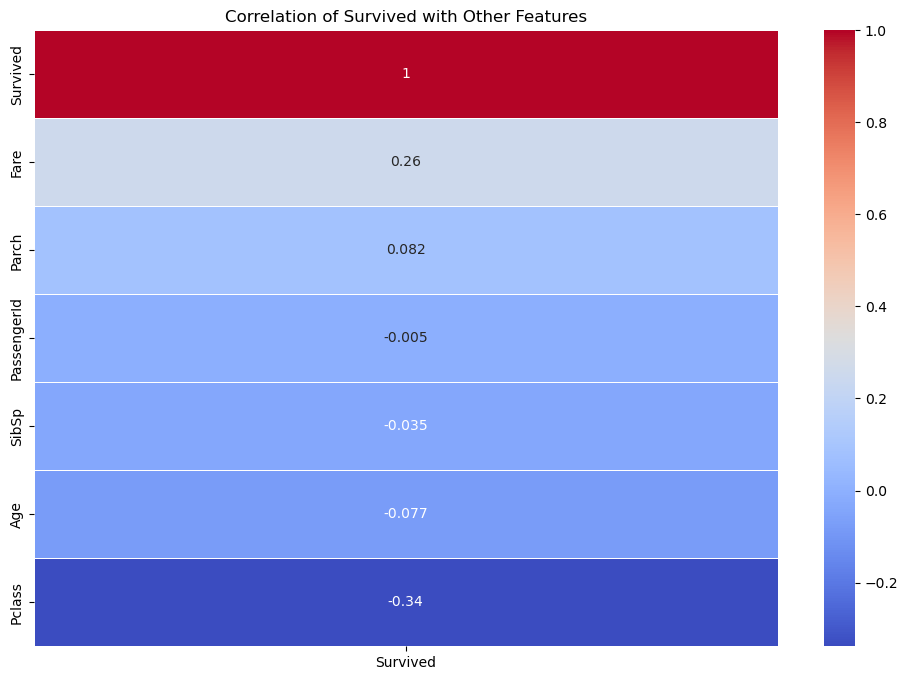

In [11]:
# Compute the correlation matrix for 'Survived' with other features
correlation_matrix = titanic.corr().loc['Survived', :].sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Survived with Other Features')
plt.show()

### Passengers Survived

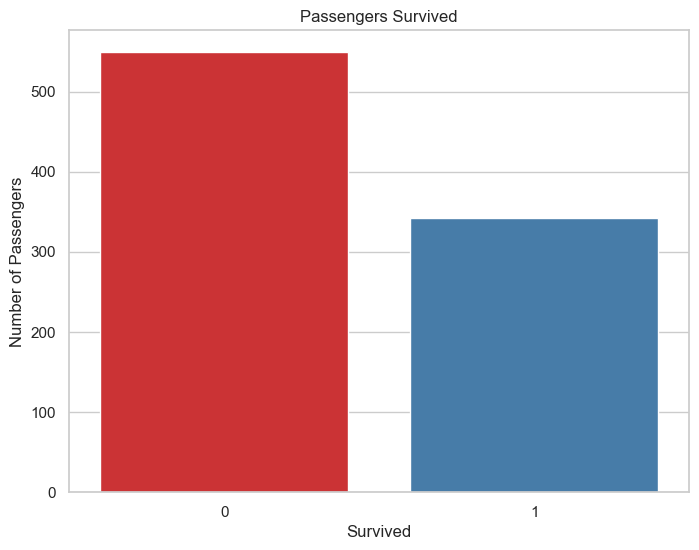

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Survived", palette="Set1")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived")
plt.show()

### Passengers by Class

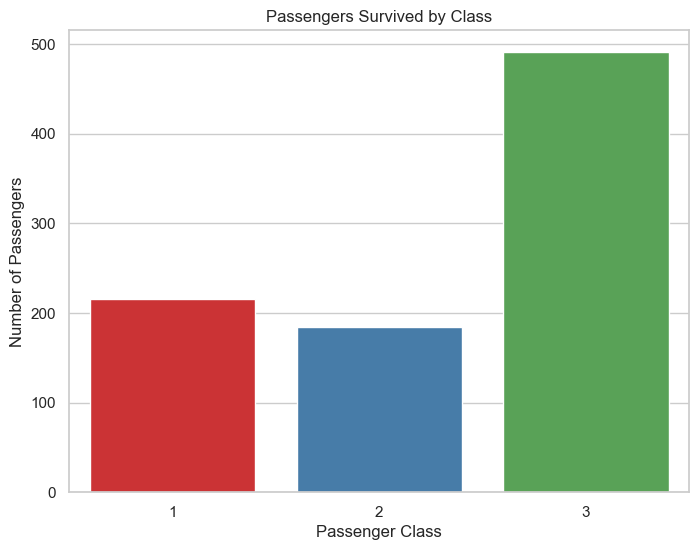

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Pclass", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Class")
plt.show()

### Survival by Class

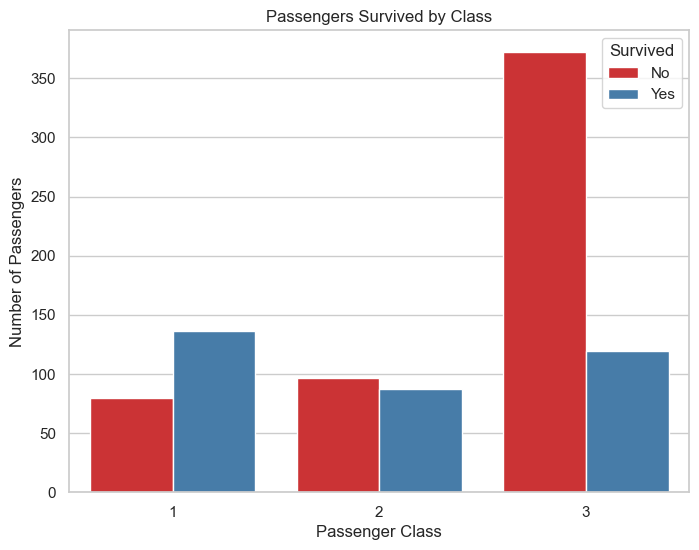

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Pclass", hue="Survived", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Class")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Passengers by Gender

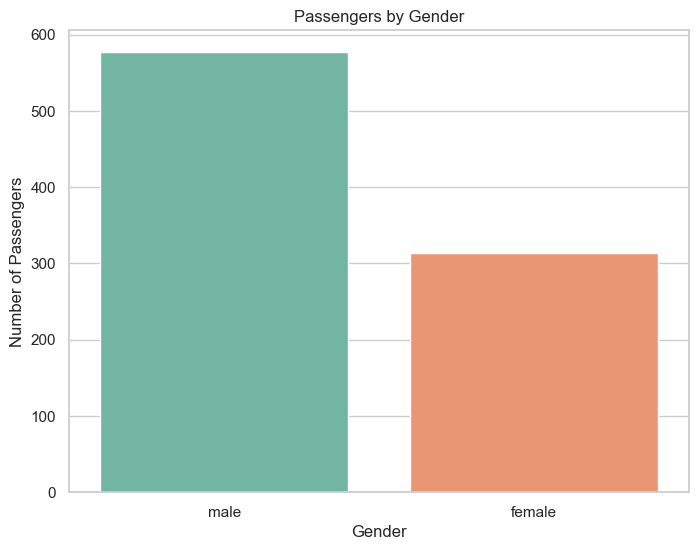

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Sex", palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Passengers by Gender")
plt.show()

### Survival by Gender

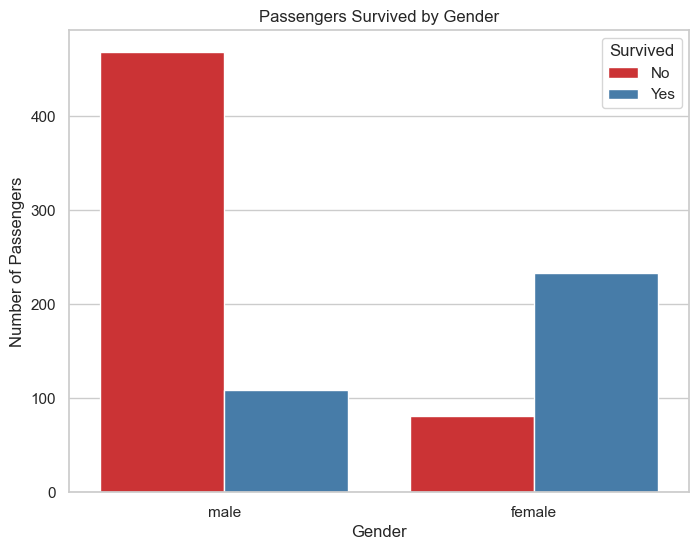

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Sex", hue="Survived", palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Age Histograms

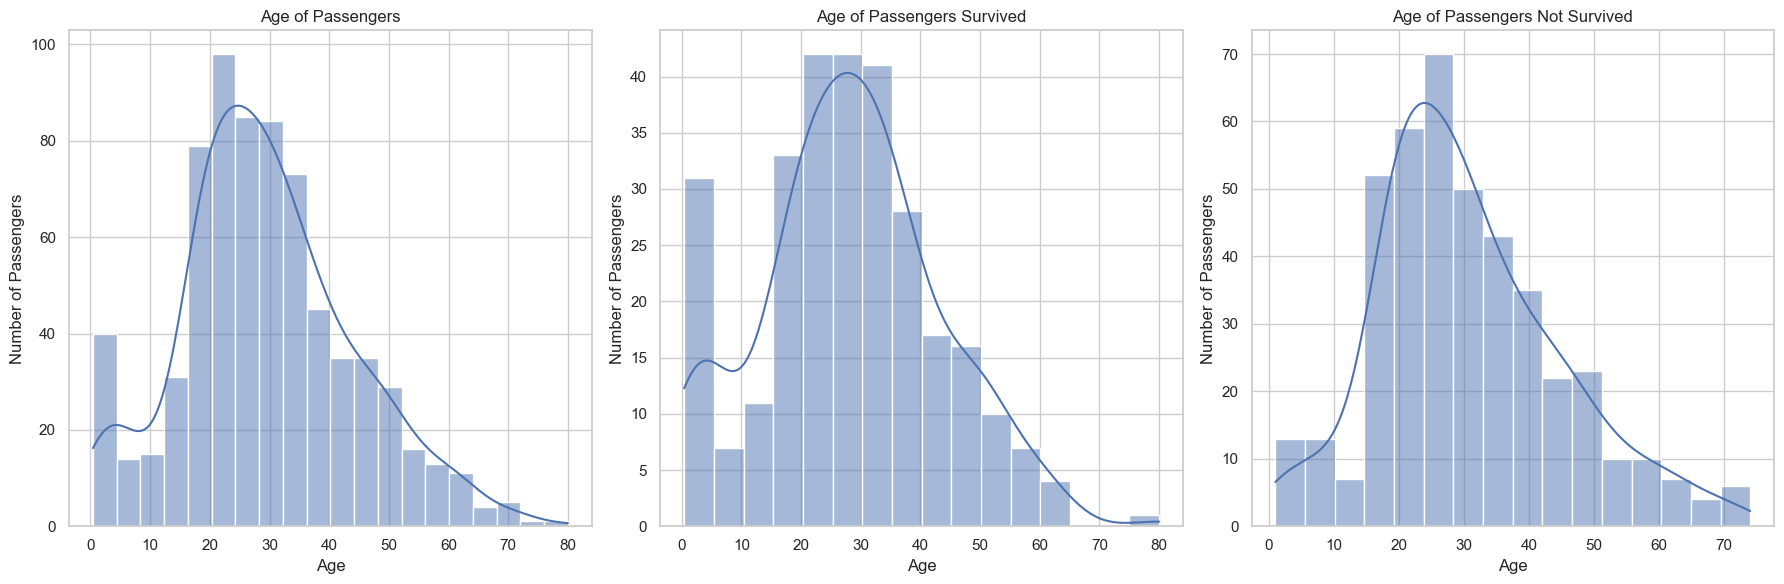

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total age histogram
sns.set(style="whitegrid")
sns.histplot(data=titanic, x="Age", kde=True, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Passengers")
axes[0].set_title("Age of Passengers")

# Age histogram of passengers who survived
sns.set(style="whitegrid")
sns.histplot(data=titanic[titanic['Survived'] == 1], x="Age", kde=True, ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of Passengers")
axes[1].set_title("Age of Passengers Survived")

# Age histogram of passengers who did not survive
sns.set(style="whitegrid")
sns.histplot(data=titanic[titanic['Survived'] == 0], x="Age", kde=True, ax=axes[2])
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of Passengers")
axes[2].set_title("Age of Passengers Not Survived")

plt.tight_layout()
plt.show()

### Survival by Age

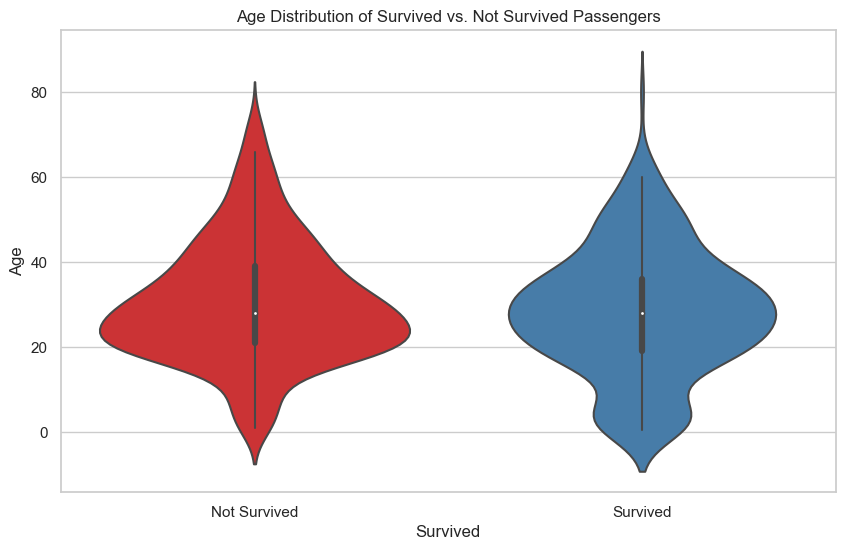

In [18]:
# Create a violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="Survived", y="Age", data=titanic, palette="Set1")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age Distribution of Survived vs. Not Survived Passengers")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

### Fare Distribution by Class

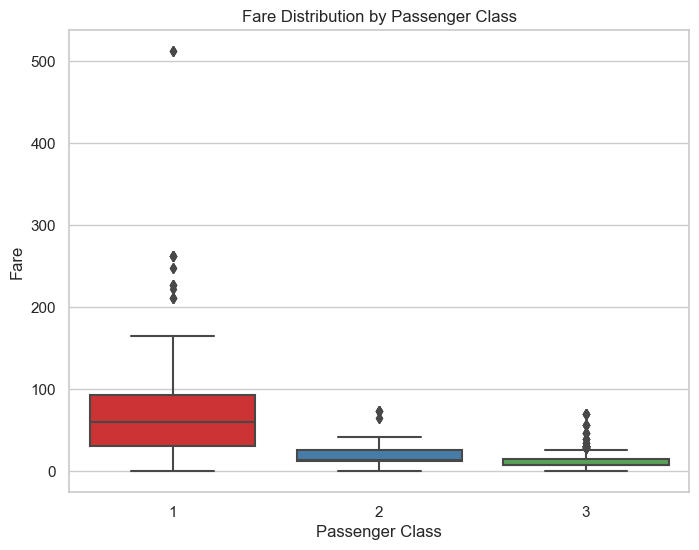

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x="Pclass", y="Fare", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.show()

### Scatter Plot of Fare by Age

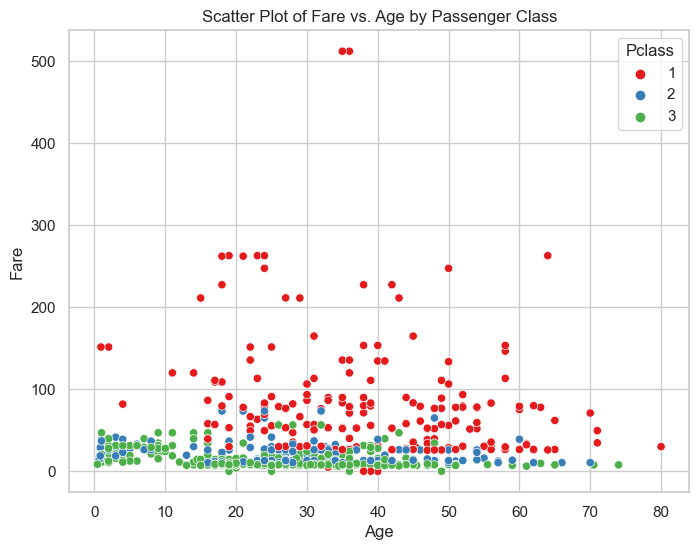

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Pclass", palette="Set1")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Fare vs. Age by Passenger Class")
plt.show()

### Survival by Embarked

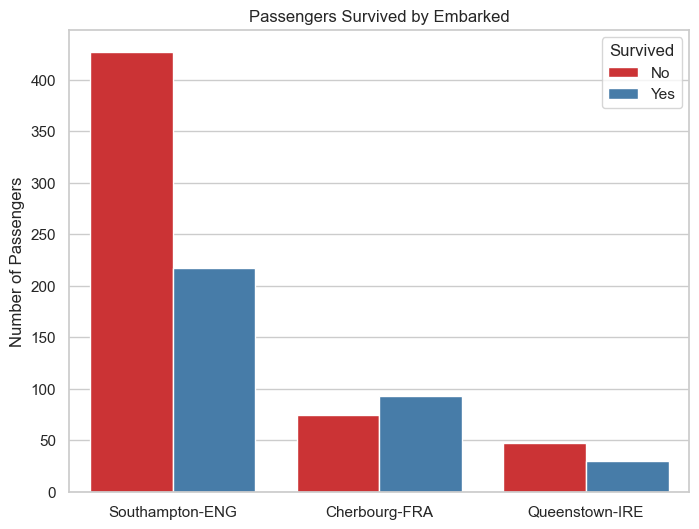

In [21]:
custom_labels = ['Southampton-ENG', 'Cherbourg-FRA', 'Queenstown-IRE']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Embarked", hue="Survived", palette="Set1")
plt.xlabel("")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Embarked")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.xticks([0, 1, 2], custom_labels)
plt.show()  

### Survival by Cabin

In [22]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

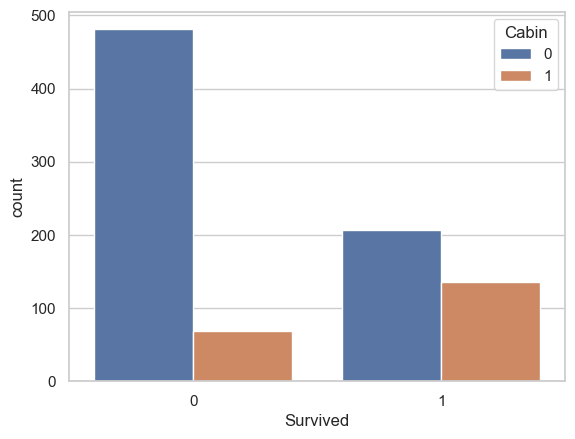

In [23]:
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

for i in range(len(train)):
    if(train.at[i,"Cabin"] != 0):
        train.at[i,"Cabin"] = 1

for i in range(len(test)):
    if(test.at[i,"Cabin"] != 0):
        test.at[i,"Cabin"] = 1

sns.countplot(x = "Survived", hue = "Cabin", data= train)

## Predicting Survival

In [24]:
# Importing test and train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Filling missing ages by calculating mean ages for each Pclass and Sex combination
mean_age_class_sex = train.groupby(['Pclass', 'Sex'])['Age'].mean()

for i in range(len(train)):
    if pd.isnull(train.at[i, "Age"]):
        train.at[i, "Age"] = mean_age_class_sex[train.at[i, "Pclass"], train.at[i, "Sex"]]

for i in range(len(test)):
    if pd.isnull(test.at[i, "Age"]):
        test.at[i, "Age"] = mean_age_class_sex[test.at[i, "Pclass"], test.at[i, "Sex"]]

# Filling missing fares by calculating mean ages for each Pclass and Sex combination
mean_fare_class_sex = train.groupby(['Pclass', 'Sex'])['Fare'].mean()
train["Fare"] = train["Fare"].fillna(0)
test["Fare"] = test["Fare"].fillna(0)

for i in range(len(train)):
    if train.at[i, "Fare"] == 0:
        train.at[i, "Fare"] = mean_fare_class_sex[train.at[i, "Pclass"], train.at[i, "Sex"]]

for i in range(len(test)):
    if test.at[i, "Fare"] == 0:
        test.at[i, "Fare"] = mean_fare_class_sex[test.at[i, "Pclass"], test.at[i, "Sex"]]

# Changing Cabin column
# If NaN = 0, if else 1
train["Cabin"] = train["Cabin"].fillna(0)
test["Cabin"] = test["Cabin"].fillna(0)

for i in range(len(train)):
    if(train.at[i,"Cabin"] != 0):
        train.at[i,"Cabin"] = 1

for i in range(len(test)):
    if(test.at[i,"Cabin"] != 0):
        test.at[i,"Cabin"] = 1

# Encoding the 'Sex' column in a similar way to the Survived to simplify understanding
# Male passengers had a higher chance of dying so they receive 0 for Sex
# Sex: 0 = Male | 1 = Female
# Survived: 0 = No | 1 = Yes
dummy = pd.get_dummies(train["Sex"])
train["Sex"] = dummy["female"]

dummy = pd.get_dummies(test["Sex"])
test["Sex"] = dummy["female"]

# We also encode the column Embarked
# 1 for column Q = Embarked at Queenstown-IRE
# 1 for column S = Embarked at Southampton-ENG
# 0 for both = Embarked at Cherbourg-FRA
emb_dummies = pd.get_dummies(train["Embarked"])
train["Q"] = emb_dummies["Q"]
train["S"] = emb_dummies["S"]
train.drop(columns="Embarked", inplace = True)

emb_dummies = pd.get_dummies(test["Embarked"])
test["Q"] = emb_dummies["Q"]
test["S"] = emb_dummies["S"]
test.drop(columns="Embarked", inplace = True)

# Uniting SibSp and Parch into Family
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

# Dropping useless columns for modelling
train.drop(columns = {"Ticket", "SibSp", "Parch", "Name"}, inplace = True)
test.drop(columns = {"Ticket", "SibSp", "Parch", "Name"}, inplace = True)

# Datasets are ready for modelling
# This part might be confusing, but we need to train and fit a model using TRAIN.CSV data, since we do not have the answer for the TEST.CSV data
# Because of this, we need to split our TRAIN.CSV into train and test data to fit each model, find the best parameters and then fit again with these parameters
# We use this second fitting to predict the Survival of the PassengerIds of the test.csv file
# We can't test the accuracy on our own because we do not have the true result, so we have to export the prediction to a csv and upload it to Kaggle.
# The variables ending in 0 are the bigger ones, that come from the "train" and "test" csv's
# The usual split X_train, X_test, y_train, y_test come from the "train.csv" because that's the only way to test a model accuracy on our own
X0 = train[["Pclass", "Sex", "Age", "Fare", "Cabin", "Q", "S", "Family"]]
y0 = train["Survived"]
X_test0 = test[["Pclass", "Sex", "Age", "Fare", "Cabin", "Q", "S", "Family"]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X0 = scaler.fit_transform(X0)
X_test0 = scaler.fit_transform(X_test0)

X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.2, random_state = 2023)

### KNN

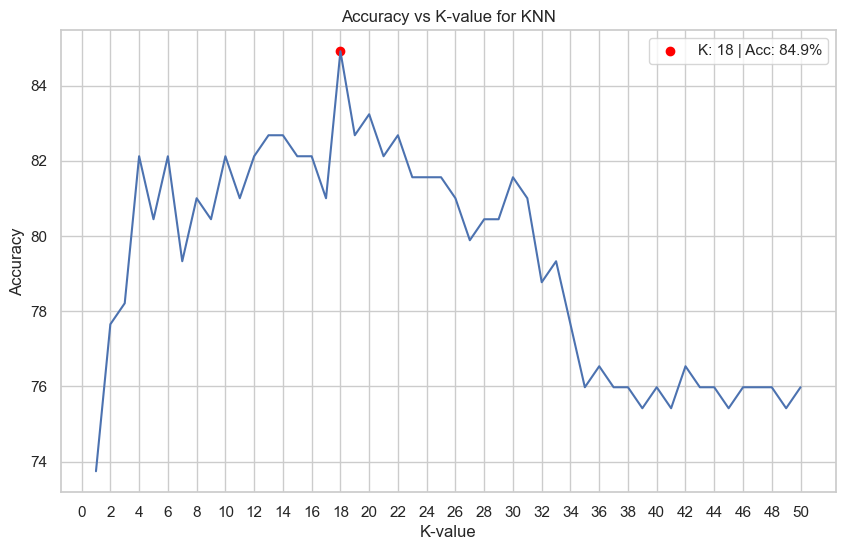

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

In [26]:
KNN = KNeighborsClassifier(n_neighbors = 18)
KNN.fit(X0, y0)
pred = KNN.predict(X_test0)
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test["PassengerId"]
df_KNN["Survived"] = pred
df_KNN.to_csv('df_KNN.csv', index=False)

### Decision Tree

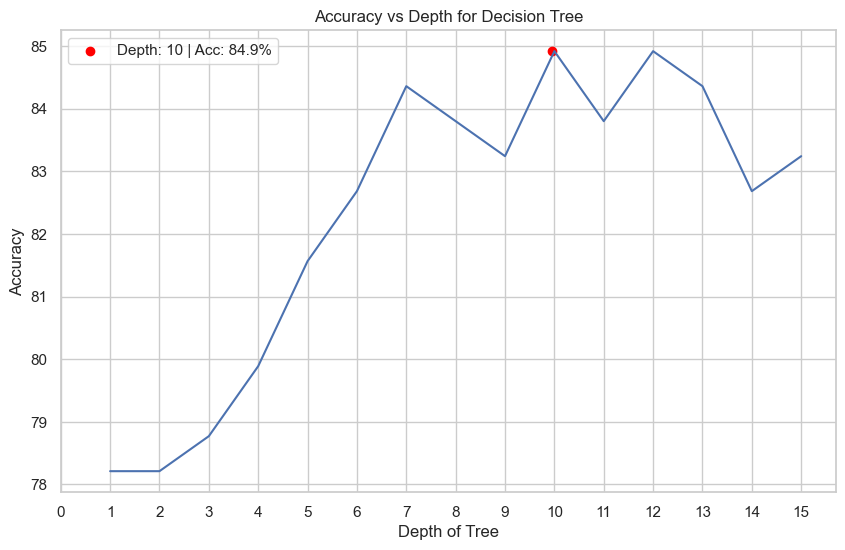

In [27]:
from sklearn.tree import DecisionTreeClassifier

DT_results = []

for i in range(1,16):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 16, 1))
plt.grid(True)
plt.show()

In [28]:
DT = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 10)
DT.fit(X0, y0)
pred = DT.predict(X_test0)
df_DT = pd.DataFrame()
df_DT["PassengerId"] = test["PassengerId"]
df_DT["Survived"] = pred
df_DT.to_csv('df_DT.csv', index=False)

### Random Forest

Best combination
Depth          9.00000
Estimators    22.00000
Accuracy      86.03352
Name: 151, dtype: float64


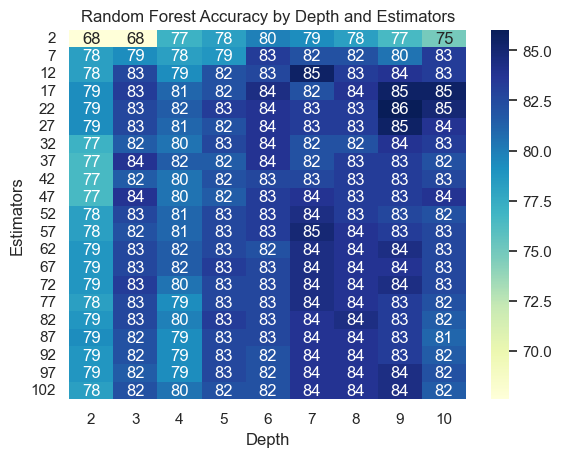

In [29]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

In [30]:
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X0, y0)
pred = RF_model.predict(X_test0)
RF = pd.DataFrame()
RF["PassengerId"] = test["PassengerId"]
RF["Survived"] = pred
RF.to_csv('RF.csv', index=False)

### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

# Unlike the other models, Naive Bayes has no parameters that need tuning
NB_model = GaussianNB()
NB_model.fit(X0, y0)
pred = NB_model.predict(X_test0)
NB = pd.DataFrame()
NB["PassengerId"] = test["PassengerId"]
NB["Survived"] = pred
NB.to_csv('NB.csv', index=False)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define ranges for hyperparameters
penalty_values = ['l1', 'l2']
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]  # List of C values to test
solver_values = ['liblinear', 'saga', 'sag', 'lbfgs']  # Different solvers supporting both 'l1' and 'l2' penalties

# Perform grid search
LR_results = []

for params in ParameterGrid({'penalty': penalty_values, 'C': C_values, 'solver': solver_values}):
    if (params['solver'] in ['lbfgs', 'sag']) and params['penalty'] == 'l1':
        continue  # Skip 'lbfgs' and 'sag' solvers with 'l1' penalty
    clf_lr = LogisticRegression(**params)
    clf_lr.fit(X_train, y_train.values.ravel())
    yhat = clf_lr.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), yhat)
    LR_results.append({'Penalty': params['penalty'], 'C': params['C'], 'Solver': params['solver'], 'Accuracy': accuracy})

LR_results_df = pd.DataFrame(LR_results)

# Find the row index with the maximum accuracy
best_row_index = LR_results_df['Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best result
best_hyperparameters = LR_results_df.loc[best_row_index, ['C', 'Solver', 'Penalty', 'Accuracy']]
best_C = best_hyperparameters['C']
best_solver = best_hyperparameters['Solver']
best_penalty = best_hyperparameters['Penalty']

LR_model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
LR_model.fit(X0, y0)
pred = LR_model.predict(X_test0)
LR = pd.DataFrame()
LR["PassengerId"] = test["PassengerId"]
LR["Survived"] = pred
LR.to_csv('LR.csv', index=False)

### Stochastic Gradient

In [36]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\n")

# Fit a model using the best parameters
SGD_model = SGDClassifier(**best_params)
SGD_model.fit(X0, y0)
SGD_pred = SGD_model.predict(X_test0)
SGD = pd.DataFrame()
SGD["PassengerId"] = test["PassengerId"]
SGD["Survived"] = pred
SGD.to_csv('SGD.csv', index=False)

Best Parameters: {'alpha': 1, 'loss': 'modified_huber', 'penalty': 'l2'}
Best Score: 0.8090121146459175




### XGBoost

In [37]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term (lambda)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and fit a model
best_params = grid_search.best_params_
XGB_model = xgb.XGBClassifier(**best_params)
XGB_model.fit(X0, y0)
XGB_pred = XGB_model.predict(X_test0)
XGB = pd.DataFrame()
XGB["PassengerId"] = test["PassengerId"]
XGB["Survived"] = pred
XGB.to_csv('XGB.csv', index=False)

### AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_adaboost = GridSearchCV(adaboost, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train.values.ravel())

best_adaboost = grid_search_adaboost.best_estimator_
best_adaboost.fit(X0, y0)
adaboost_pred = best_adaboost.predict(X_test0)
ADA = pd.DataFrame()
ADA["PassengerId"] = test["PassengerId"]
ADA["Survived"] = pred
ADA.to_csv('AdaBoost.csv', index=False)

### Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

grid_search_bagging = GridSearchCV(bagging, param_grid=param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train, y_train.values.ravel())

best_bagging = grid_search_bagging.best_estimator_
best_bagging.fit(X0, y0)
bagging_pred = best_bagging.predict(X_test0)
bag = pd.DataFrame()
bag["PassengerId"] = test["PassengerId"]
bag["Survived"] = pred
bag.to_csv('Bagging.csv', index=False)

### Extra Trees

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier()
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search_extra_trees = GridSearchCV(extra_trees, param_grid=param_grid_extra_trees, cv=5)
grid_search_extra_trees.fit(X_train, y_train.values.ravel())

best_extra_trees = grid_search_extra_trees.best_estimator_
best_extra_trees.fit(X0, y0)
extra_trees_pred = best_extra_trees.predict(X_test0)
et = pd.DataFrame()
et["PassengerId"] = test["PassengerId"]
et["Survived"] = pred
et.to_csv('Extra Trees.csv', index=False)

### CatBoost

In [41]:
from catboost import CatBoostClassifier

# Define the CatBoost Classifier
catboost = CatBoostClassifier(verbose=False)

# Define the grid of parameters to search
param_grid_catboost = {"depth": [4, 6, 8]}

# Perform Grid Search with cross-validation
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_catboost = grid_search_catboost.best_params_
best_accuracy_catboost = grid_search_catboost.best_score_

# Fit a model with the best params
catboost = CatBoostClassifier(**best_params_catboost, verbose=False)
catboost.fit(X0, y0)
catboost_pred = catboost.predict(X_test)
cat = pd.DataFrame()
cat["PassengerId"] = test["PassengerId"]
cat["Survived"] = pred
cat.to_csv('CatBoost.csv', index=False)